In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [100]:
df = pd.read_excel("legumes.xlsx")
df.set_index("Legumes", inplace = True)
df.head(50)

,Eau,ENG,PROT,GLUC,LIPI,SUC,FIBR
Legumes,,,,,,,
AilFrais,64.3,131.00,5.81,21.20,0.34,1.43,4.70
ArtichautCuit,85.8,33.20,2.53,0.99,0.28,0.99,8.30
Asperge,93.0,19.80,2.53,0.81,0.32,0.81,1.80
Aubergine,89.7,32.70,1.23,4.17,0.28,3.41,4.30
Avocat,75.7,155.00,1.61,3.67,13.80,1.00,4.00
BetteraveRouge,87.1,47.20,1.84,8.56,0.18,7.96,2.00
Blettes,95.3,20.60,0.70,0.46,0.20,0.46,2.50
Brocolis,92.5,22.80,2.10,1.10,0.78,1.10,1.50
CarotteCrue,89.6,36.40,0.77,6.45,0.26,5.42,2.70


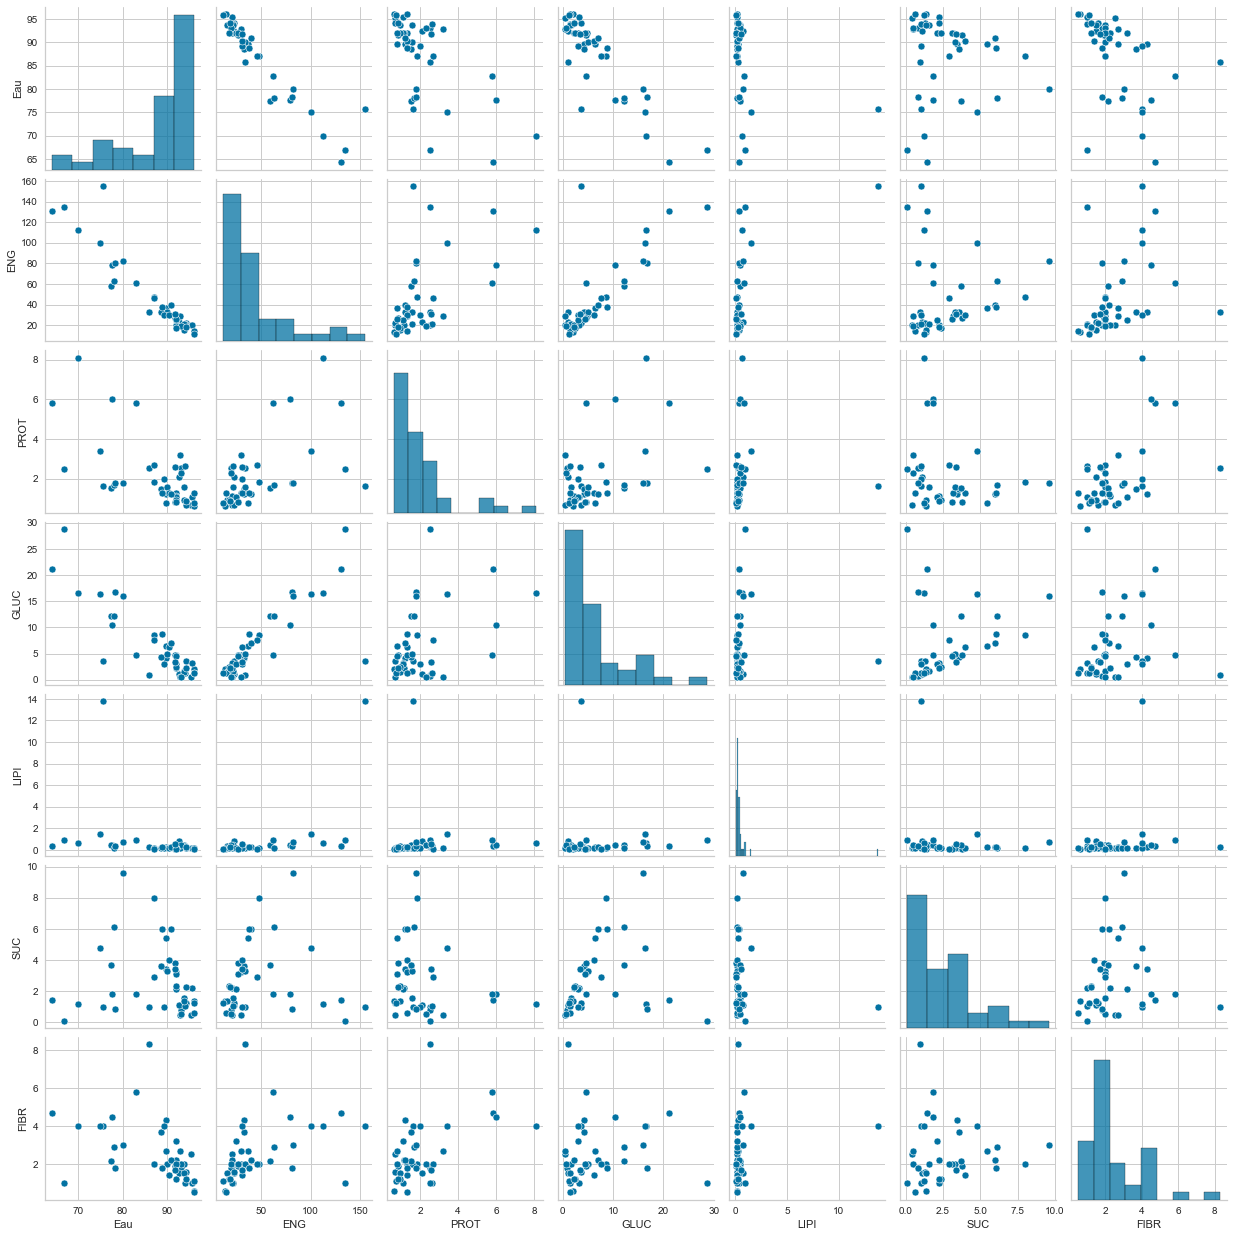

In [47]:
import seaborn as sns
sns.pairplot(df)

In [48]:
from sklearn import preprocessing
leg_cr = preprocessing.scale(df)


In [49]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

n_f = list(df.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

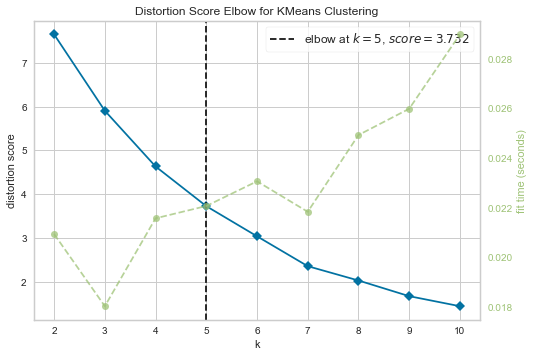

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
X = (df - df.mean(axis=0)) / df.std(axis=0)


# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 10)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

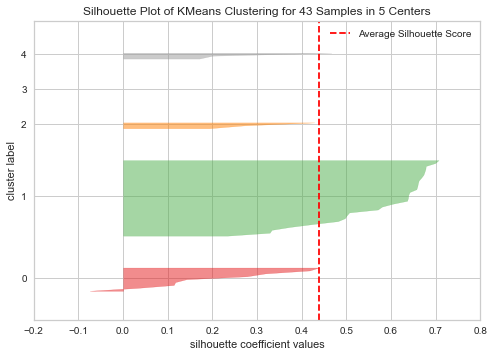

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 43 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

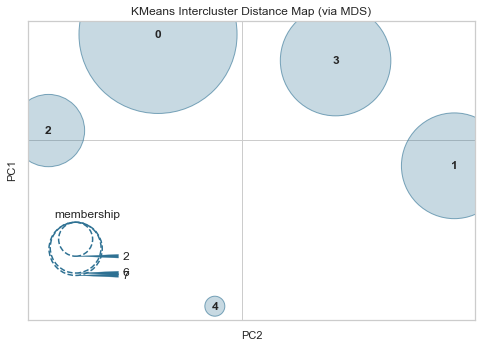

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [88]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

In [89]:
# K-means avec 5 groupes
from sklearn import cluster

res = cluster.KMeans(n_clusters=K)

In [90]:
res.fit(X)

KMeans(n_clusters=5)

In [91]:
res.predict(X)

array([1, 3, 0, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 4, 4, 3, 0, 4, 0, 1, 0, 0, 1, 4, 0, 0, 0, 4])

In [92]:
# num de cluster affectés aux groupes
res.labels_

array([1, 3, 0, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 4, 4, 3, 0, 4, 0, 1, 0, 0, 1, 4, 0, 0, 0, 4])

In [93]:
import numpy
numpy.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([27,  6,  1,  2,  7], dtype=int64))

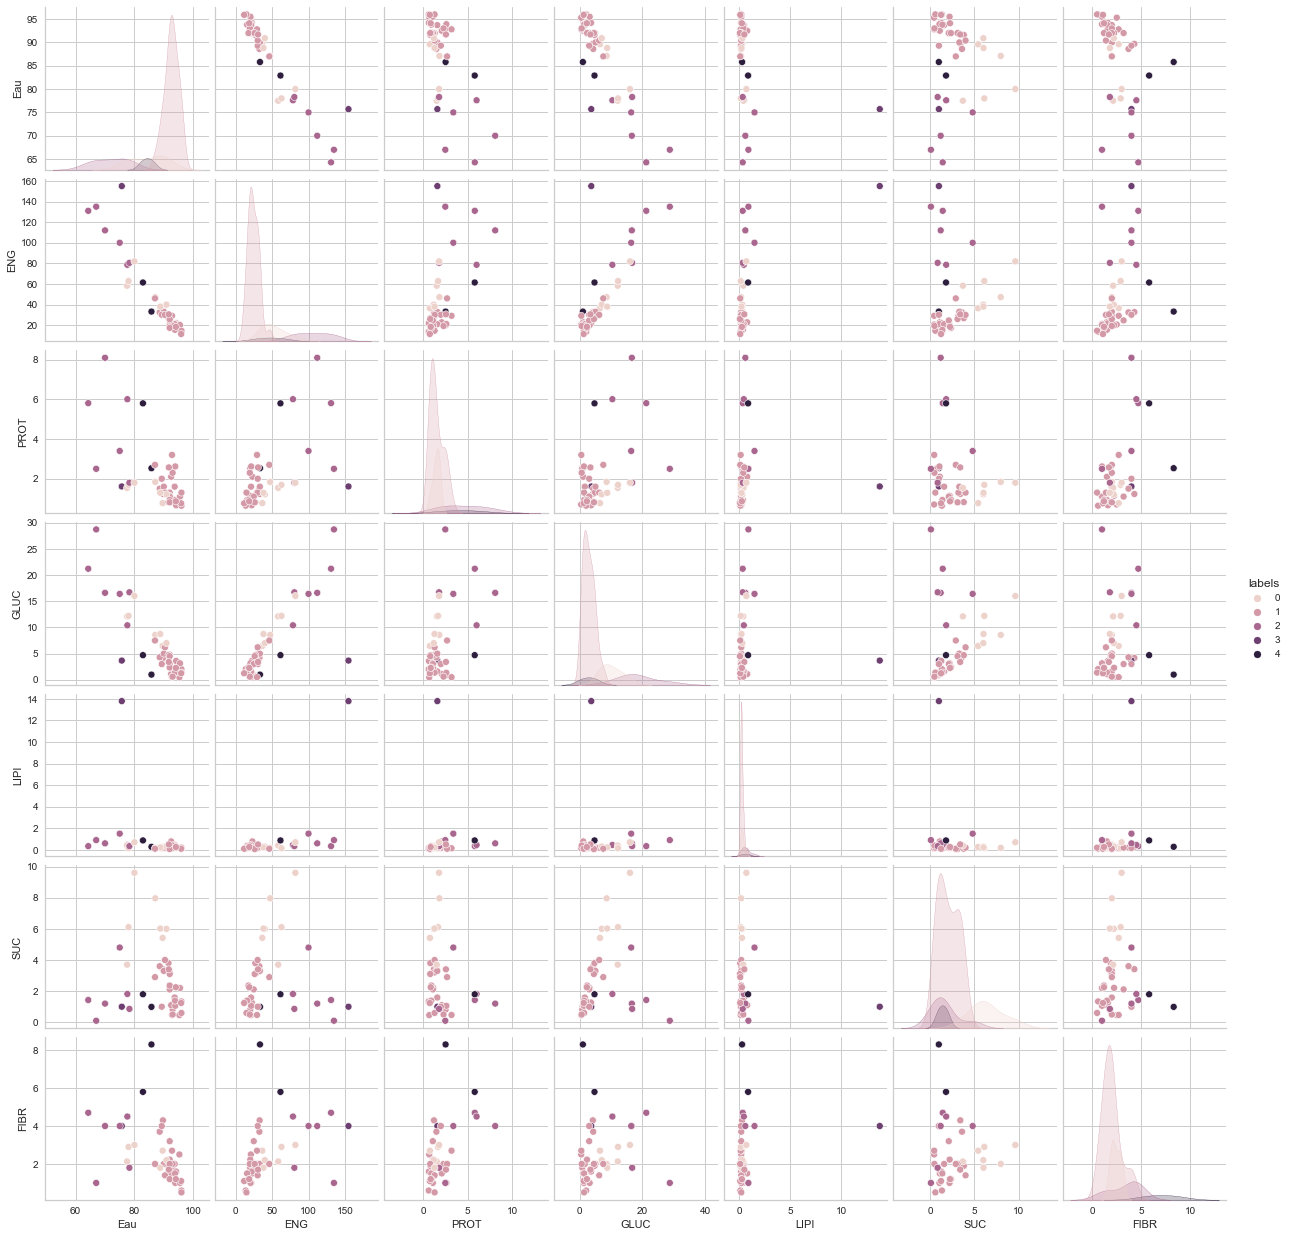

In [58]:
import seaborn as sns
# Rajouter la variable au data-frame initial
B = df
B['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(B,hue="labels")

In [94]:

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(leg_cr, res.labels_)

0.7457116299365557

In [23]:
#librairies pour la CAH
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [24]:
#générer la matrice des liens
Z = linkage(leg_cr,method='ward',metric='euclidean')

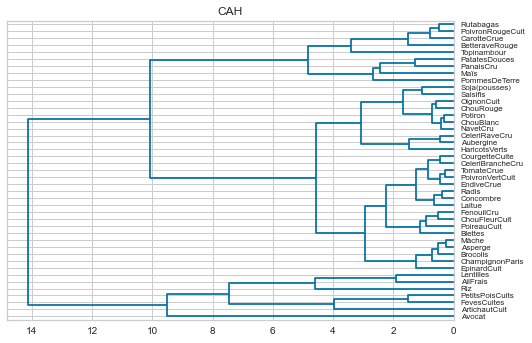

In [25]:
plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='left',color_threshold=0)
plt.show()

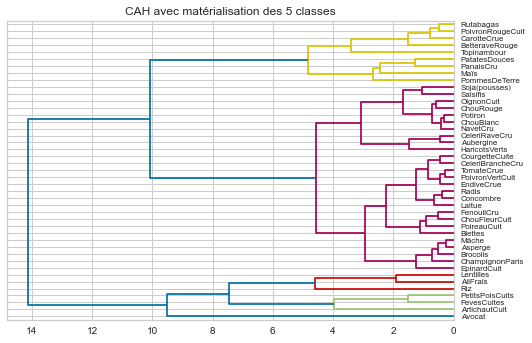

In [30]:
#matérialisation des 5 classes (hauteur t = 5)
#On choisi un niveau égale à 5 pour découper l'arbre 
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z,labels=df.index,orientation='left',color_threshold=5)
plt.show()

In [27]:
#découpage à la hauteur t = 11 ==> 4 identifiants de groupes obtenus
groupes_cah = fcluster(Z,t=11,criterion='distance')
print(groupes_cah)

[1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2
 1 2 2 2 2 2]


In [60]:
# Reducing the dimensionality of the Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_principal = pca.fit_transform(leg_cr)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']



Temps total d'execution :  0.052687800000057905 




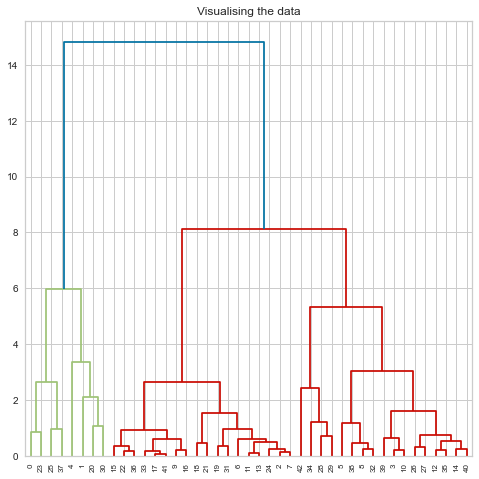

In [104]:
# Visualizing the working of the Dendograms
import time
import scipy.cluster.hierarchy as shc
 
time_start = time.perf_counter()

plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='ward')))

time_elapsed = (time.perf_counter() - time_start)

print("\n\nTemps total d'execution : ", time_elapsed, "\n\n")

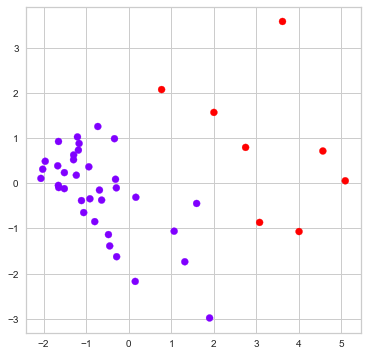

In [62]:
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering(n_clusters=2)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.show()

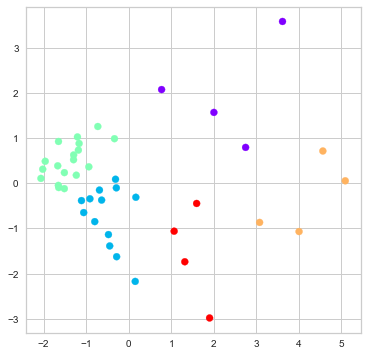

In [63]:
ac4 = AgglomerativeClustering(n_clusters=5)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=ac4.fit_predict(X_principal), cmap='rainbow')
plt.show()

In [64]:

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_principal, res.labels_)

0.621349250824011